# Create a modiﬁed preferential attachment model that penalizes the age of a node

# Question 3.a

In [1]:
library('igraph')


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [2]:
#create graph
g=sample_pa_age(n=1000,pa.exp=1,aging.exp=-1,m=1,zero.deg.appeal=1,zero.age.appeal=0,deg.coef=1,age.coef=1,directed=F)

The mean is  1.998 variance is  2.904901

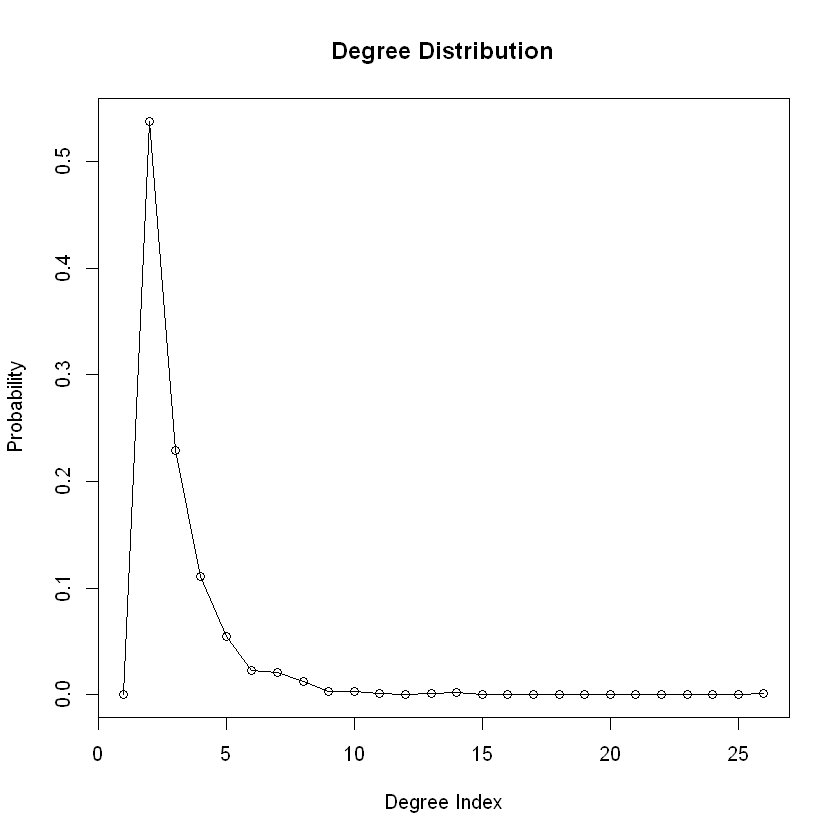

In [3]:
#plot degree distribution
plot(degree_distribution(g),main=sprintf('Degree Distribution'),xlab="Degree Index",ylab="Probability")
#edges between vertices
lines(degree_distribution(g))
#report the mean and variance of the degree distributions
cat("The mean is ",mean(degree(g)),"variance is ",var(degree(g)))


Call:
lm(formula = log_dd ~ log_d)

Coefficients:
(Intercept)        log_d  
      2.253       -3.419  



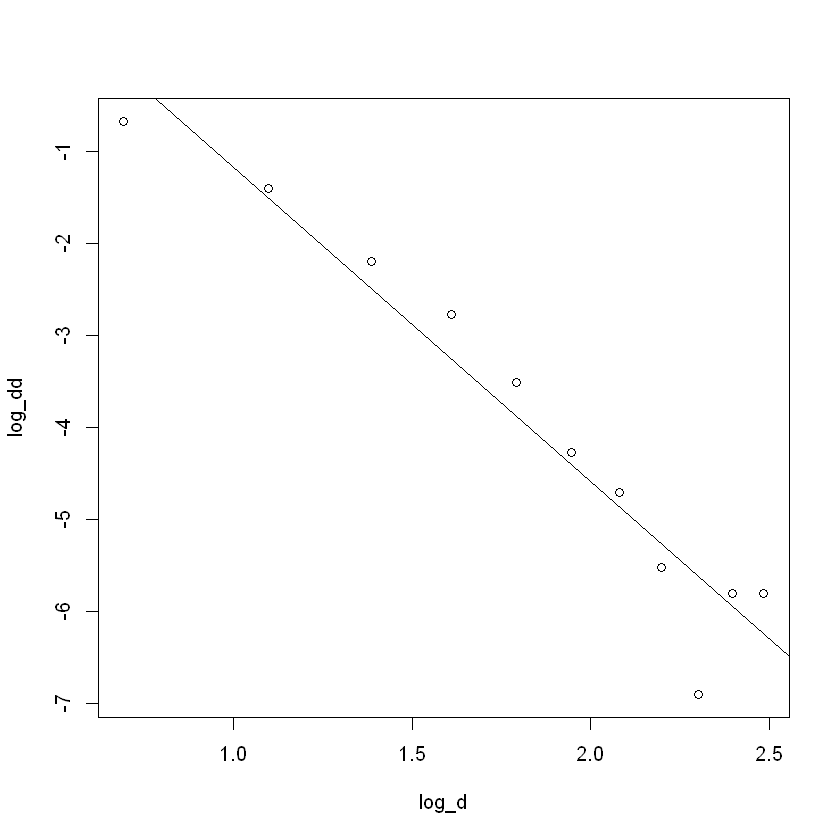

In [27]:
#plot log-log scale degree distribution
#fine nonzero value index
dd=degree_distribution(g)
index=which(dd!=0)
#extract degree distribution corresponding to nonzero index
log_dd=log(dd)[index]
log_d=log(seq(1:length(dd)))[index]

#Fit a linear model
model=lm(log_dd~log_d)
#plot scatter and model together
plot(log_d,log_dd,abline(model))
#print out model coefficients
print(model)

In [28]:
#"The power law exponent is -gamma, therefore, gamma is 3.419"

# Question 3.b
Use fast greedy method to ﬁnd the community structure. What is the modularity?


Modularity is  0.9360131

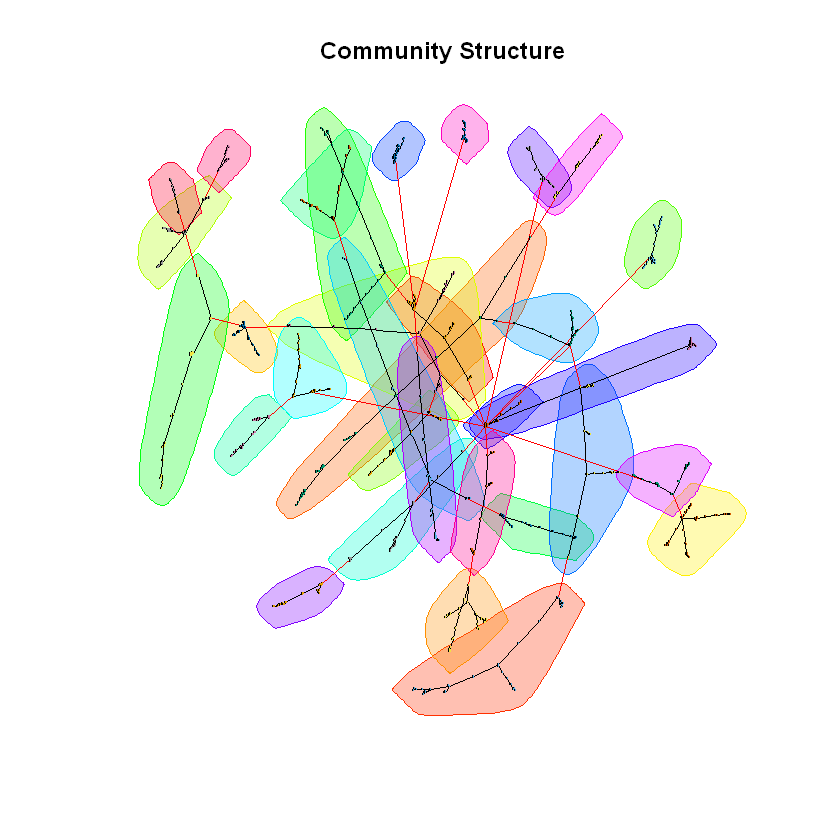

In [4]:
#community structure list
community=cluster_fast_greedy(g)
#modularity
mod=modularity(community)
cat("Modularity is ",mod)
plot(community,g,main="Community Structure",vertex.size=0.2,vertex.label=NA)